In [9]:
import pandas as pd
import numpy as np  
import os
import gc
import psutil
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde


In [23]:
# Get the current directory
current_dir = os.getcwd()

# Navigate one folder up
parent_dir = os.path.dirname(current_dir)

# Where the files are located
data = 'data\lookups'

# Navigate down into the "data" folder
data_dir = os.path.join(parent_dir, data)

In [4]:
# Dictionary to store DataFrames with the file name as key
dataframes = {}

# Loop through all files in the folder
for file_name in os.listdir(data_dir):
    if file_name.endswith('.csv'):  # Check if the file is a CSV
        file_path = os.path.join(data_dir, file_name)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Store the DataFrame in the dictionary using the file name (without .csv)
        df_name = file_name.replace('.csv', '')  # Remove the .csv extension
        dataframes[df_name] = df
        
        # Print the dimensions (rows, columns) of the DataFrame
        print(f"File: {file_name} | Dimensions: {df.shape}")


File: data-lake-prd-314410.cz.canais.csv | Dimensions: (1350, 11)
File: data-lake-prd-314410.cz.cidades.csv | Dimensions: (46381, 6)
File: data-lake-prd-314410.cz.hoteis-competidores.csv | Dimensions: (13681, 5)
File: data-lake-prd-314410.cz.hoteis-quartos.csv | Dimensions: (115527, 9)
File: data-lake-prd-314410.cz.hoteis-tarifas.csv | Dimensions: (471985, 5)
File: data-lake-prd-314410.cz.hoteis.csv | Dimensions: (19650, 12)
File: data-lake-prd-314410.cz.moedas.csv | Dimensions: (64, 9)
File: data-lake-prd-314410.cz.ocupacao-tipo.csv | Dimensions: (220, 5)


In [6]:
dataframes.keys()

dict_keys(['data-lake-prd-314410.cz.canais', 'data-lake-prd-314410.cz.cidades', 'data-lake-prd-314410.cz.hoteis-competidores', 'data-lake-prd-314410.cz.hoteis-quartos', 'data-lake-prd-314410.cz.hoteis-tarifas', 'data-lake-prd-314410.cz.hoteis', 'data-lake-prd-314410.cz.moedas', 'data-lake-prd-314410.cz.ocupacao-tipo'])

In [13]:
data_lake_prd_314410_cz_canais = dataframes['data-lake-prd-314410.cz.canais']
data_lake_prd_314410_cz_cidades = dataframes['data-lake-prd-314410.cz.cidades']
data_lake_prd_314410_cz_hoteis_competidores = dataframes['data-lake-prd-314410.cz.hoteis-competidores']
data_lake_prd_314410_cz_hoteis_quartos = dataframes['data-lake-prd-314410.cz.hoteis-quartos']
data_lake_prd_314410_cz_hoteis_tarifas = dataframes['data-lake-prd-314410.cz.hoteis-tarifas']
data_lake_prd_314410_cz_hoteis = dataframes['data-lake-prd-314410.cz.hoteis']
data_lake_prd_314410_cz_moedas = dataframes['data-lake-prd-314410.cz.moedas']
data_lake_prd_314410_cz_ocupacao_tipo = dataframes['data-lake-prd-314410.cz.ocupacao-tipo']


In [ ]:
# del  dataframes, data, current_dir, data_dir, df, df_name, file_name, file_path, parent_dir

In [18]:
# Function to get memory usage in bytes
def memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss  # Resident Set Size (in bytes)

# Check memory usage before garbage collection
memory_before = memory_usage()

# Trigger garbage collection
gc.collect()

# Check memory usage after garbage collection
memory_after = memory_usage()

# Calculate memory cleared
memory_cleared = memory_before - memory_after

print(f"Memory before GC: {memory_before / 1024**2:.2f} MB")
print(f"Memory after GC: {memory_after / 1024**2:.2f} MB")
print(f"Memory cleared: {memory_cleared / 1024**2:.2f} MB")

Memory before GC: 189.40 MB
Memory after GC: 189.40 MB
Memory cleared: 0.00 MB


In [26]:
data_lake_prd_314410_cz_hoteis_canais_combinations = pd.read_csv('c:\\Users\\paulo\\Desktop\\hotels brazil\\data\\lookups\\data-lake-prd-314410.cz.hoteis_canais_combinations.csv')

In [ ]:
# Split the 'distinct_combinations' column into two separate columns
data_lake_prd_314410_cz_hoteis_canais_combinations[['Hotel_ID', 'Canal_ID']] = data_lake_prd_314410_cz_hoteis_canais_combinations['distinct_combinations'].str.split('-', expand=True)

# Convert the new columns to integers
data_lake_prd_314410_cz_hoteis_canais_combinations['Hotel_ID'] = data_lake_prd_314410_cz_hoteis_canais_combinations['Hotel_ID'].astype(int)
data_lake_prd_314410_cz_hoteis_canais_combinations['Canal_ID'] = data_lake_prd_314410_cz_hoteis_canais_combinations['Canal_ID'].astype(int)

# Drop the original 'distinct_combinations' column
data_lake_prd_314410_cz_hoteis_canais_combinations.drop(columns=['distinct_combinations'], inplace=True)


In [29]:
data_lake_prd_314410_cz_hoteis_canais_combinations.head()

,Hotel_ID,Canal_ID
0,3869,32
1,9258,32
2,2059,32
3,5874,672
4,12648,124


In [39]:
data_lake_prd_314410_cz_hoteis_canais_combinations.shape

(330330, 2)

In [36]:
data_lake_prd_314410_cz_hoteis_canais_combinations['Hotel_ID'].nunique()

10432

In [37]:
data_lake_prd_314410_cz_hoteis_canais_combinations['Canal_ID'].nunique()

785

In [38]:
data_lake_prd_314410_cz_hoteis_canais_combinations['Hotel_ID'].nunique() * data_lake_prd_314410_cz_hoteis_canais_combinations['Canal_ID'].nunique()

8189120

In [2]:
data_lake_prd_314410_cz_pull_pesquisas_average_price_hotel_currency = pd.read_csv('c:\\Users\\paulo\\Desktop\\hotels brazil\\data\\other\\data-lake-prd-314410.cz.pull-pesquisas_average_price_hotel_currency.csv')
data_lake_prd_314410_cz_moedas = pd.read_csv('c:\\Users\\paulo\\Desktop\\hotels brazil\\data\\lookups\\data-lake-prd-314410.cz.moedas.csv')

In [ ]:
# Perform left join
data_lake_prd_314410_cz_pull_pesquisas_average_price_hotel_currency = pd.merge(data_lake_prd_314410_cz_pull_pesquisas_average_price_hotel_currency, 
                     data_lake_prd_314410_cz_moedas[['Moeda_ID', 'Cotacao_USD']], 
                     on='Moeda_ID', 
                     how='left')

# Display the merged dataframe
print(data_lake_prd_314410_cz_pull_pesquisas_average_price_hotel_currency.head())

In [4]:
data_lake_prd_314410_cz_pull_pesquisas_average_price_hotel_currency['weighted_mean_diaria_usd'] = \
    data_lake_prd_314410_cz_pull_pesquisas_average_price_hotel_currency['weighted_mean_diaria'] * \
        data_lake_prd_314410_cz_pull_pesquisas_average_price_hotel_currency['Cotacao_USD']

In [11]:

# Filter the DataFrame to keep only the rows where 'weighted_mean_diaria_usd' <= 1000
filtered_df = data_lake_prd_314410_cz_pull_pesquisas_average_price_hotel_currency[data_lake_prd_314410_cz_pull_pesquisas_average_price_hotel_currency['weighted_mean_diaria_usd'] <= 1000]
filtered_df = filtered_df[~filtered_df['weighted_mean_diaria_usd'].isin([float('inf'), -float('inf')])]
filtered_df = filtered_df.dropna(subset=['weighted_mean_diaria_usd'])
filtered_df = filtered_df['weighted_mean_diaria_usd']
filtered_df

0         34.953084
1         37.147196
2        209.312235
3         71.338007
4         47.414470
            ...    
10429     56.756496
10430    397.756751
10431     29.767301
10432     27.198549
10433     76.168200
Name: weighted_mean_diaria_usd, Length: 10395, dtype: float64

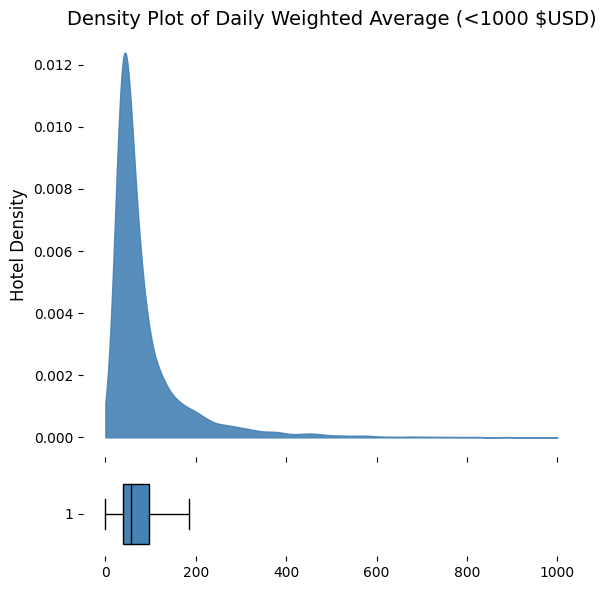

In [29]:


# Plot the density using scipy's gaussian_kde
kde = gaussian_kde(filtered_df)
x = np.linspace(filtered_df.min(), filtered_df.max(), 1000)
y = kde(x)

# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6), gridspec_kw={'height_ratios': [5, 1]}, sharex=True)

# --- First plot (Density plot) ---
ax1.fill_between(x, y, color='steelblue', alpha=0.9)
ax1.set_ylabel('Hotel Density', fontsize=12)
ax1.set_title('Density Plot of Daily Weighted Average (<1000 $USD)', fontsize=14)

# Remove the frame (spines) from the density plot
for spine in ax1.spines.values():
    spine.set_visible(False)

# --- Second plot (Boxplot) ---
ax2.boxplot(filtered_df, vert=False, patch_artist=True, 
            boxprops=dict(facecolor='steelblue', color='black'), 
            medianprops=dict(color='black'), 
            showfliers=False,   # Hide the outliers
            widths=0.7),         # Make the box wider

# Remove the frame (spines) from the boxplot
for spine in ax2.spines.values():
    spine.set_visible(False)

# Display the plot
plt.tight_layout()
plt.show()